In [2]:
import pandas as pd
import requests
from config import api_key
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
from sklearn import linear_model
import statsmodels.api as sm
import re

In [3]:
cityblocks_df = pd.read_csv('Resources/GeoLite2-City-Blocks-IPv6.csv')
locations_df = pd.read_csv('Resources/GeoLite2-City-Locations-en.csv')
# cityblocks_df= cityblocks_df.dropna()
# locations_df= locations_df.dropna()
# cityblocks_df

In [4]:
cityblocks_df = cityblocks_df.loc[:, ['geoname_id', 'latitude', 'longitude']]
cityblocks_df= cityblocks_df.dropna()
cityblocks_df

,geoname_id,latitude,longitude
0,2657896,47.3664,8.5546
1,5332921,37.2502,-119.7513
2,1848354,35.5598,139.6484
3,1861060,36.0000,138.0000
4,1861060,36.0000,138.0000
...,...,...,...
474010,953987,-29.0000,24.0000
474011,953987,-29.0000,24.0000
474012,953987,-29.0000,24.0000
474013,2328926,10.0000,8.0000


In [5]:
locations_df = locations_df.loc[:, ['city_name', 'geoname_id']]
locations_df= locations_df.dropna()
locations_df

,city_name,geoname_id
0,Protaras,18918
2,Oddur,49747
4,Mogadishu,53654
5,Merca,54225
6,Kismayo,55671
...,...,...
120604,Barrio Bicentenario,12112408
120605,Newry,12113105
120606,Nucleo Rural Tabatinga,12115717
120607,Pisek u Jablunkova,12122813


In [6]:
mergedDf = locations_df.merge(cityblocks_df,on='geoname_id')
mergedDf= mergedDf.dropna()
mergedDf = mergedDf.drop_duplicates()
mergedDf

,city_name,geoname_id,latitude,longitude
0,Mosul,99072,36.3350,43.1189
1,Ras Tanura,102891,26.6439,50.1592
2,Makkah,104515,21.4267,39.8261
6,Jeddah,105343,21.5168,39.2192
26,Ha'il,106281,27.5219,41.6907
...,...,...,...,...
204643,Jose C. Paz,12076997,-34.5029,-58.7512
204648,Bath,12089206,46.4758,-67.5712
204649,Balmoral,12096348,47.6790,-66.4342
204650,Tobique Narrows,12096889,46.7936,-67.6854


In [7]:
mergedDf_northern = mergedDf.loc[mergedDf["latitude"] > 0]
mergedDf_southern = mergedDf.loc[mergedDf["latitude"] < 0]

In [8]:
#Given the original dataset was over 47,000 and we are only looking for 500 cities which makes only %1.05 of the dataset. Took a random sample being confident that lats and longs will be randomized. 
mergedDf_northern_sample = mergedDf_northern.sample(n = 250) 
mergedDf_southern_sample = mergedDf_southern.sample(n = 250)
merged500Df = mergedDf_northern_sample.append(mergedDf_southern_sample)

In [9]:
merged500Df["Temperature"] = ""
merged500Df["Humidity"] = ""
merged500Df["Cloudiness"] = ""
merged500Df["Wind Speed (mph)"] = ""

In [10]:
merged500Df

,city_name,geoname_id,latitude,longitude,Temperature,Humidity,Cloudiness,Wind Speed (mph)
97464,Chamousset,3027293,45.5580,6.1942,,,,
116121,Hostomice,3075043,50.5822,13.8163,,,,
78364,Heide,2908032,54.1973,9.0976,,,,
195216,Toronto,6167865,43.6426,-79.4002,,,,
56839,Birmingham,2655603,52.4468,-1.8302,,,,
...,...,...,...,...,...,...,...,...
131647,Guernica,3480740,-34.9172,-58.3869,,,,
44008,Lorne,2159545,-38.5370,143.9751,,,,
45202,Wollongong,2171507,-34.4272,150.8942,,,,
125799,Natal,3394023,-5.8109,-35.2238,,,,


In [11]:
base_url = "http://api.openweathermap.org/data/2.5/weather?&units=metric"
params = {"appid": api_key}

for index, row in merged500Df.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    
    params["lat"] = lat
    params["lon"] = lon
    
    response = requests.get(base_url,params).json()
        
    try:
        print(f"Grabbing where city id is {response['id']} and the city is {response['name']}.")
        merged500Df.loc[index,"Temperature"] = response['main']['temp']
        merged500Df.loc[index, "Humidity"] = response['main']['humidity']
        merged500Df.loc[index, "Cloudiness"] = response['clouds']['all']
        merged500Df.loc[index, "Wind Speed (mph)"] = response['wind']['speed']
        
    except(KeyError, IndexError):
        print("Missing field/result... skipping.")

    print("------------")

Grabbing where city id is 2998763 and the city is Le Villard.
------------
Grabbing where city id is 3075043 and the city is Hostomice.
------------
Grabbing where city id is 2908032 and the city is Heide.
------------
Grabbing where city id is 7870801 and the city is Harbourfront.
------------
Grabbing where city id is 8224782 and the city is Shirley.
------------
Grabbing where city id is 5746545 and the city is Portland.
------------
Grabbing where city id is 2834945 and the city is Schwarzenfeld.
------------
Grabbing where city id is 2992024 and the city is Montrond-les-Bains.
------------
Grabbing where city id is 6455313 and the city is Valence-en-Poitou.
------------
Grabbing where city id is 3024026 and the city is Conches-en-Ouche.
------------
Grabbing where city id is 4200849 and the city is Hogansville.
------------
Grabbing where city id is 7626389 and the city is Jøa.
------------
Grabbing where city id is 1851012 and the city is Takarazuka.
------------
Grabbing where c

In [12]:
merged500Df

,city_name,geoname_id,latitude,longitude,Temperature,Humidity,Cloudiness,Wind Speed (mph)
97464,Chamousset,3027293,45.5580,6.1942,23,35,96,2.6
116121,Hostomice,3075043,50.5822,13.8163,18.77,42,71,1.2
78364,Heide,2908032,54.1973,9.0976,14.66,35,20,6.7
195216,Toronto,6167865,43.6426,-79.4002,2.56,74,40,2.6
56839,Birmingham,2655603,52.4468,-1.8302,7.52,93,75,3.1
...,...,...,...,...,...,...,...,...
131647,Guernica,3480740,-34.9172,-58.3869,20,72,0,4.1
44008,Lorne,2159545,-38.5370,143.9751,8.16,91,100,1.6
45202,Wollongong,2171507,-34.4272,150.8942,11.42,84,37,1.52
125799,Natal,3394023,-5.8109,-35.2238,26.48,88,75,5.1


In [13]:
bins = [-90,0,90]
group_names = ["Southern","Northern"]

In [14]:
merged500Df["Hemisphere"] = pd.cut(merged500Df["latitude"], bins, labels=group_names)
merged500Df
merged500Df.to_csv('weather.csv', index=False)

In [15]:
merged500Df_northern = merged500Df.loc[merged500Df["Hemisphere"] == "Northern"]
merged500Df_southern = merged500Df.loc[merged500Df["Hemisphere"] == "Southern"]
merged500Df_northern

,city_name,geoname_id,latitude,longitude,Temperature,Humidity,Cloudiness,Wind Speed (mph),Hemisphere
97464,Chamousset,3027293,45.5580,6.1942,23,35,96,2.6,Northern
116121,Hostomice,3075043,50.5822,13.8163,18.77,42,71,1.2,Northern
78364,Heide,2908032,54.1973,9.0976,14.66,35,20,6.7,Northern
195216,Toronto,6167865,43.6426,-79.4002,2.56,74,40,2.6,Northern
56839,Birmingham,2655603,52.4468,-1.8302,7.52,93,75,3.1,Northern
...,...,...,...,...,...,...,...,...,...
91895,Liancourt,2998532,49.3303,2.4659,20.28,63,13,6.7,Northern
175943,Kaukauna,5258296,44.2952,-88.2713,0.21,83,0,5.41,Northern
187283,Colorado Springs,5417598,38.9488,-104.7677,1.11,51,20,2.6,Northern
90918,Mareuil-sur-Ourcq,2995822,49.1375,3.0782,21.74,62,17,0.45,Northern


R squared: -0.0864353040386577


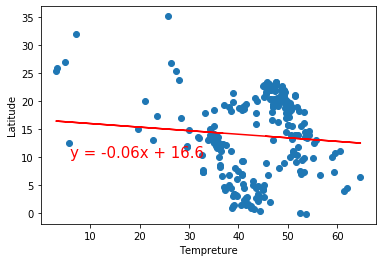

R square is  -0.0864353040386577 yada yada yada-0.06388149677294065.


<Figure size 432x288 with 0 Axes>

In [26]:
# Northern Hemisphere - Temperature (F) vs. Latitude

y_values = merged500Df_northern['Temperature'].astype('float')
x_values = merged500Df_northern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()
print(f"R square is  {rvalue} yada yada yada{slope}.")
plt.savefig('Images/Northern Temp vs Lat.png')

R squared: 0.8067590455152969


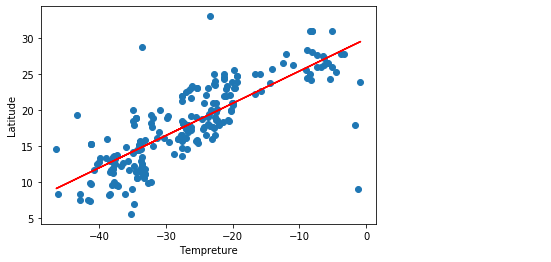

<Figure size 432x288 with 0 Axes>

In [27]:
# Southern Hemisphere - Temperature (F) vs. Latitude

y_values = merged500Df_southern['Temperature'].astype('float')
x_values = merged500Df_southern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()
plt.savefig('Images/Southern Temp vs Lat.png')

R squared: -0.39899041033876026


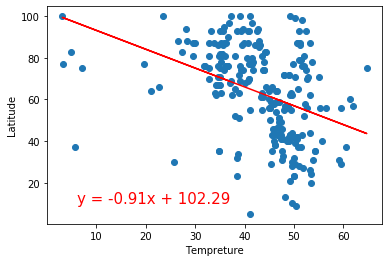

<Figure size 432x288 with 0 Axes>

In [28]:
#Northern Hemisphere - Humidity (%) vs. Latitude
y_values = merged500Df_northern['Humidity'].astype('float')
x_values = merged500Df_northern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()
plt.savefig('Images/Northern Humidity vs Lat.png')

R squared: 0.8067590455152969


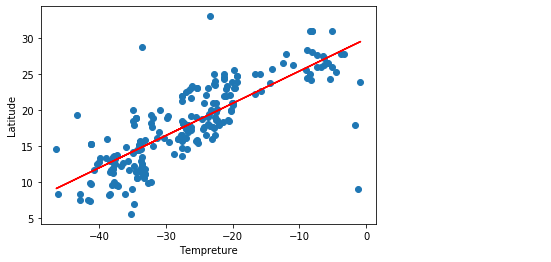

<Figure size 432x288 with 0 Axes>

In [29]:
# Southern Hemisphere - Temperature (F) vs. Latitude

y_values = merged500Df_southern['Temperature'].astype('float')
x_values = merged500Df_southern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()
plt.savefig('Images/Southern Temperature vs Lat.png')

R squared: -0.028390711234434977


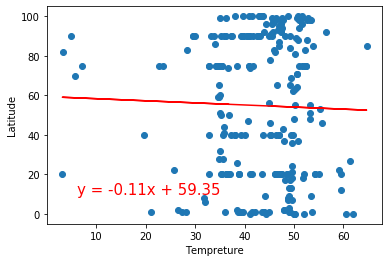

<Figure size 432x288 with 0 Axes>

In [30]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

y_values = merged500Df_northern['Cloudiness'].astype('float')
x_values = merged500Df_northern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()
plt.savefig('Images/Northern Cloudiness vs Lat.png')

R squared: 0.10897625993258661


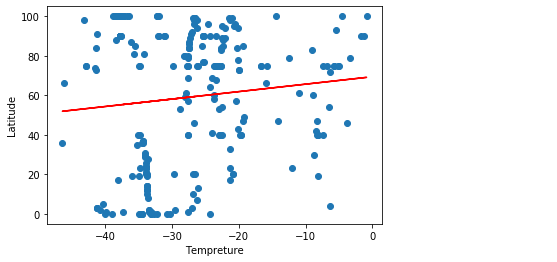

In [21]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

y_values = merged500Df_southern['Cloudiness'].astype('float')
x_values = merged500Df_southern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()
plt.savefig('Images/Northern Cloudiness vs Lat.png')

R squared: -0.022761651200247642


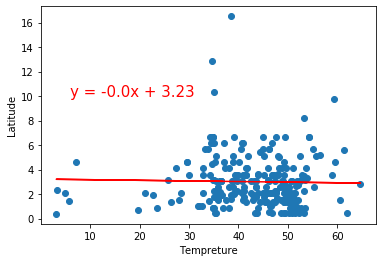

In [22]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

y_values = merged500Df_northern['Wind Speed (mph)'].astype('float')
x_values = merged500Df_northern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()

R squared: -0.03228736830880237


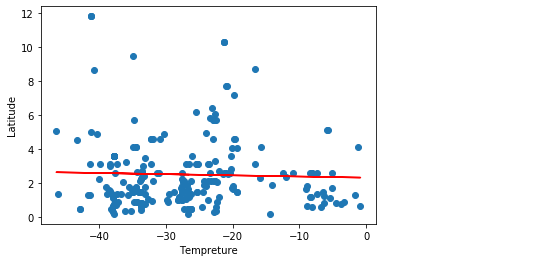

In [23]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

y_values = merged500Df_southern['Wind Speed (mph)'].astype('float')
x_values = merged500Df_southern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue}")

# Show plot
plt.show()